# Visualization Code

### Make sure you have all the output of the following cells and do the exercise at the end. You can utilize ChatGPT to explain any code that isn't understandable. Upload your final file of GitHub and share the link on Discord.

# Getting Started with Matplotlib

Pandas uses `matplotlib` to create visualizations. Therefore, before we learn how to plot with `pandas`, it's important to understand how `matplotlib` works at a high-level, which is the focus of this notebook.


## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We need to import `matplotlib.pyplot` for plotting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Plotting lines

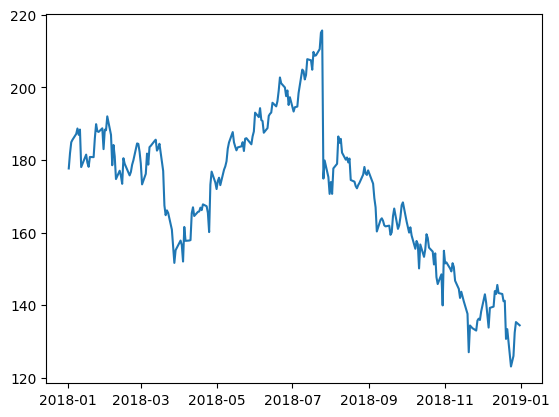

In [3]:
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

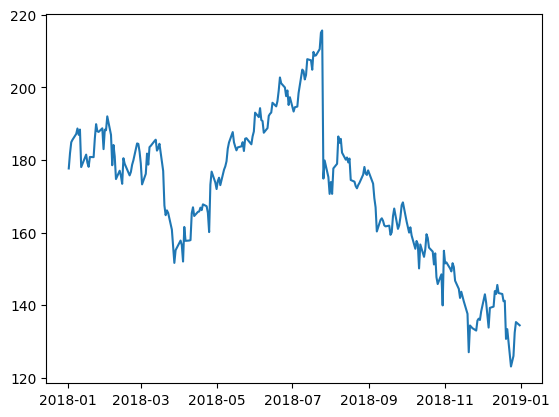

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form `[marker][linestyle][color]`. For example, we can make a black dashed line with `'--k'` or a red scatter plot with `'or'`:

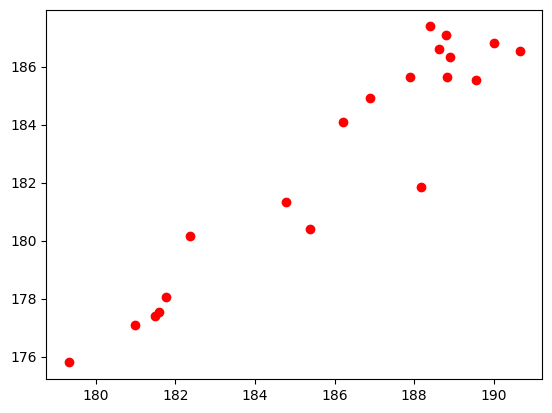

In [5]:
plt.plot('high', 'low', 'or', data=fb.head(20))

Here are some examples of how you make a format string:

| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|
 
Note that we can also use format strings of the form `[color][marker][linestyle]`, but the parsing by `matplotlib` (in rare cases) might not be what we were aiming for. Consult the *Notes* section in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for the complete list of options.

## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

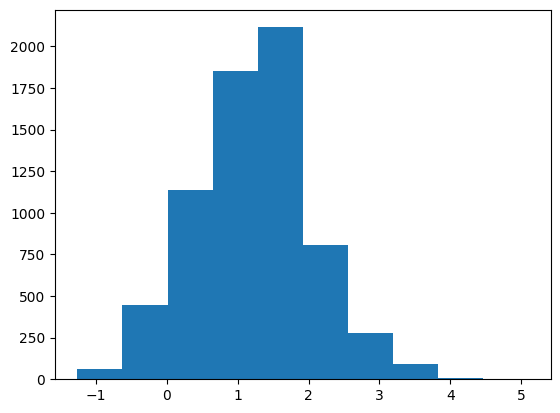

In [7]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

### Bin size matters
Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

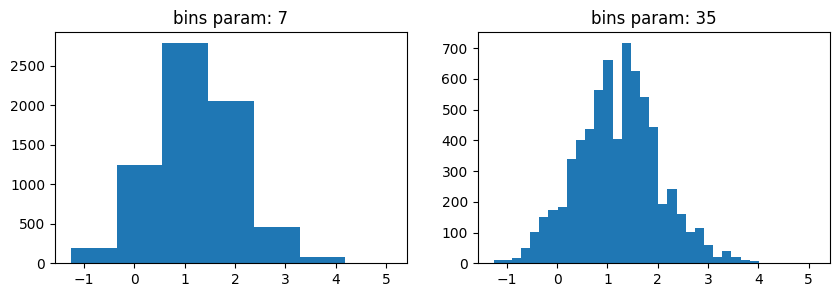

In [8]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

## Plot components
### `Figure`
Top-level object that holds the other plot components.

In [9]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

### `Axes`
Individual plots contained within the `Figure`.

## Creating subplots
Simply specify the number of rows and columns to create:

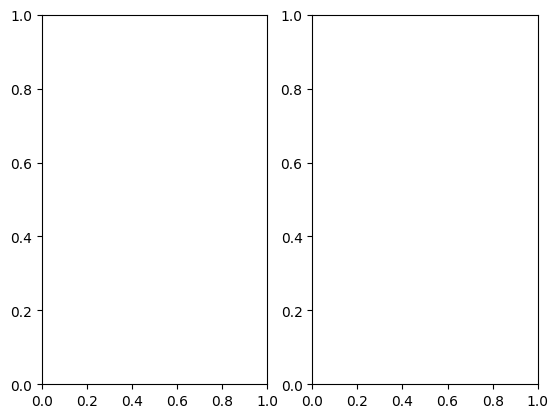

In [10]:
fig, axes = plt.subplots(1, 2)

As an alternative to using `plt.subplots()` we can add `Axes` objects to the `Figure` object on our own. This allows for some more complex layouts, such as picture in picture:

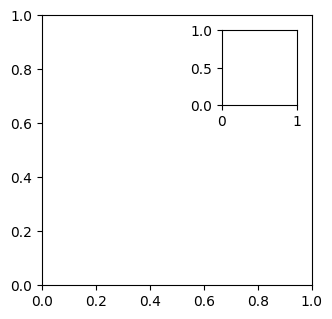

In [11]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

## Creating Plot Layouts with `gridspec`
We can create subplots with varying sizes as well:

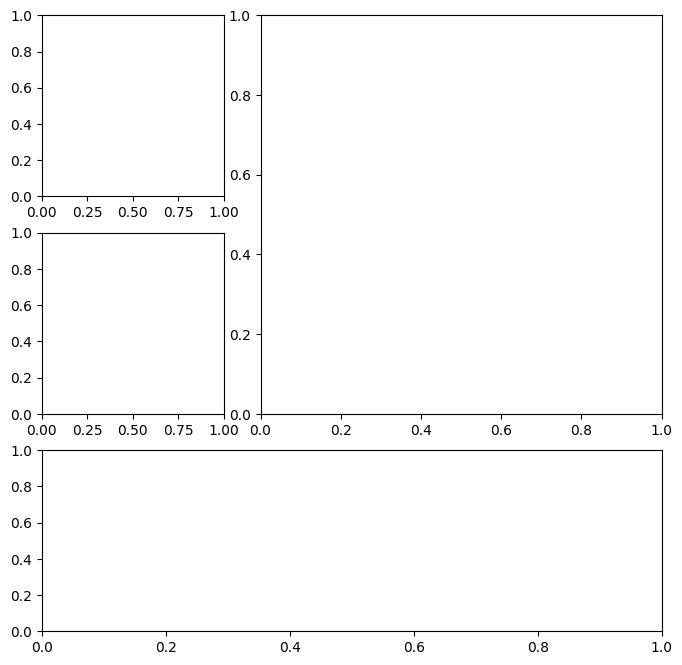

In [12]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

## Saving plots
Use `plt.savefig()` to save the last created plot. To save a specific `Figure` object, use its `savefig()` method.

In [14]:
fig.savefig('empty.png')

## Cleaning up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass in the specific `Figure` object to close or say `'all'` to close all `Figure` objects that are open. Let's close all the `Figure` objects that are open with `plt.close()`:

In [15]:
plt.close('all')

## Additional plotting options
### Specifying figure size
Just pass the `figsize` argument to `plt.figure()`. It's a tuple of `(width, height)`:

In [16]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

This can be specified when creating subplots as well:

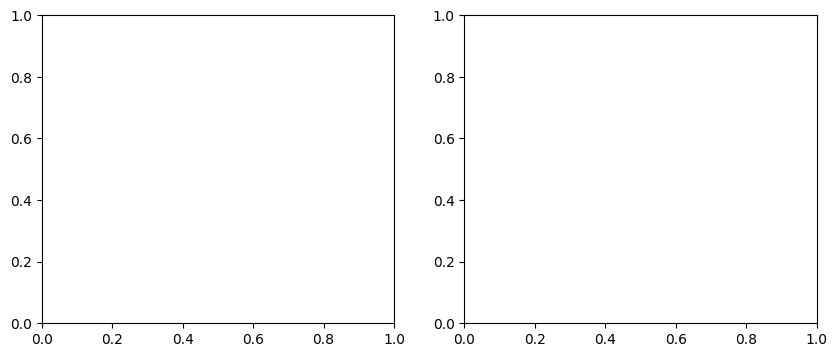

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

### `rcParams`
A small subset of all the available plot settings (shuffling to get a good variation of options):

In [18]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.titleweight',
 'boxplot.whiskerprops.linestyle',
 'date.autoformatter.day',
 'figure.constrained_layout.hspace',
 'figure.titlesize',
 'image.interpolation_stage',
 'keymap.copy',
 'legend.framealpha',
 'legend.handleheight',
 'lines.dash_joinstyle',
 'lines.markerfacecolor',
 'mathtext.default',
 'mathtext.fallback',
 'pdf.compression',
 'svg.fonttype',
 'text.usetex',
 'yaxis.labellocation',
 'ytick.major.size',
 'ytick.minor.visible']

We can check the current default `figsize` using `rcParams`:

In [19]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):

In [20]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use `rcdefaults()` to restore the defaults. Note this is slightly different than before because running `%matplotlib inline` sets a different value for `figsize` ([see more](https://github.com/ipython/ipykernel/blob/master/ipykernel/pylab/config.py#L42-L56)). After we reset, we are going back to the default value of `figsize` before that import:

In [21]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via `pyplot`:

In [22]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

# Plotting with Pandas
The `plot()` method is available on `Series` and `DataFrame` objects. Many of the parameters get passed down to `matplotlib`. The `kind` argument let's us vary the plot type. Here are some commonly used parameters:

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |

## About the Data
In this notebook, we will be working with 3 datasets:
- Facebook's stock price throughout 2018
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))
- European Centre for Disease Prevention and Control's (ECDC)collected on September 19, 2020

## Setup

In [23]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

This can be specified when creating subplots as well:

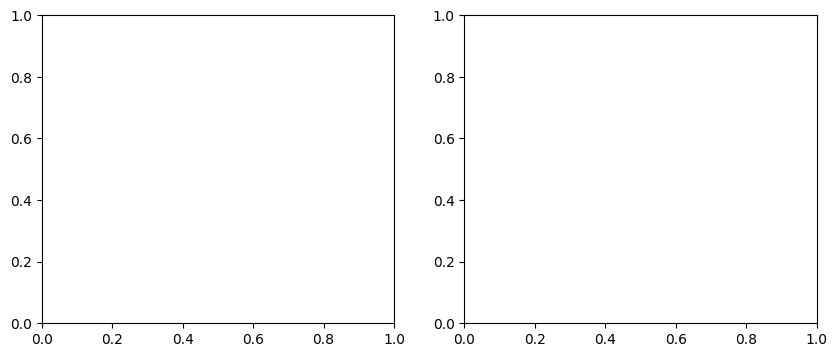

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

### `rcParams`
A small subset of all the available plot settings (shuffling to get a good variation of options):

In [25]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.titleweight',
 'boxplot.whiskerprops.linestyle',
 'date.autoformatter.day',
 'figure.constrained_layout.hspace',
 'figure.titlesize',
 'image.interpolation_stage',
 'keymap.copy',
 'legend.framealpha',
 'legend.handleheight',
 'lines.dash_joinstyle',
 'lines.markerfacecolor',
 'mathtext.default',
 'mathtext.fallback',
 'pdf.compression',
 'svg.fonttype',
 'text.usetex',
 'yaxis.labellocation',
 'ytick.major.size',
 'ytick.minor.visible']

We can check the current default `figsize` using `rcParams`:

In [26]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):

In [27]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use `rcdefaults()` to restore the defaults. Note this is slightly different than before because running `%matplotlib inline` sets a different value for `figsize` ([see more](https://github.com/ipython/ipykernel/blob/master/ipykernel/pylab/config.py#L42-L56)). After we reset, we are going back to the default value of `figsize` before that import:

In [28]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via `pyplot`:

In [29]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').sort_index()['2020-01-18':'2020-09-18']

## Evolution over time
Line plots help us see how a variable changes over time. They are the default for the `kind` argument, but we can pass `kind='line'` to be explicit in our intent:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

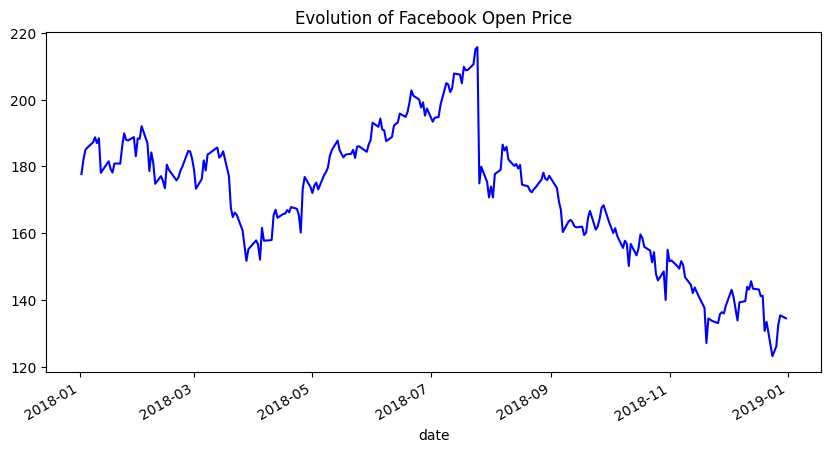

In [33]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

We provided the `style` argument in the previous example; however, we can use the `color` and `linestyle` arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

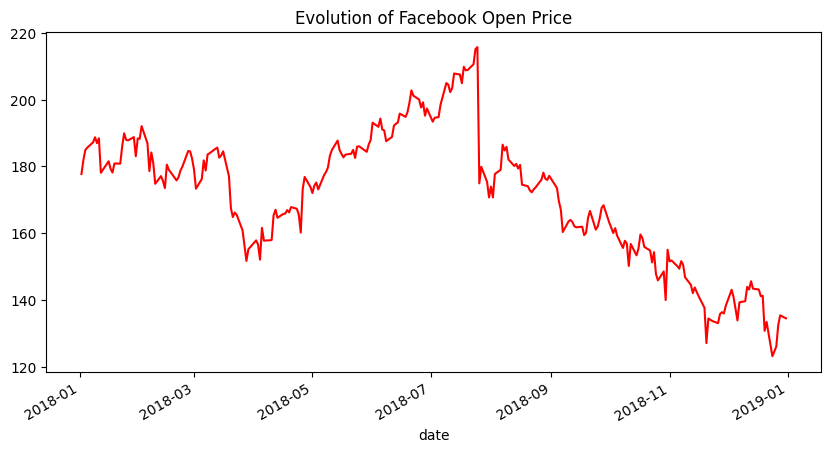

In [34]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='red',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

C:\Users\User\AppData\Local\Temp\ipykernel_10500\2558019465.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


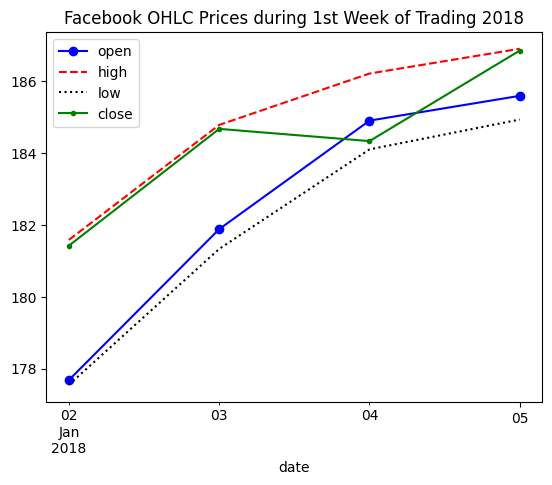

In [35]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

### Creating subplots
When plotting with `pandas`, creating subplots is simply a matter of passing `subplots=True` to the `plot()` method, and (optionally) specifying the `layout` in a tuple of `(rows, columns)`:

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

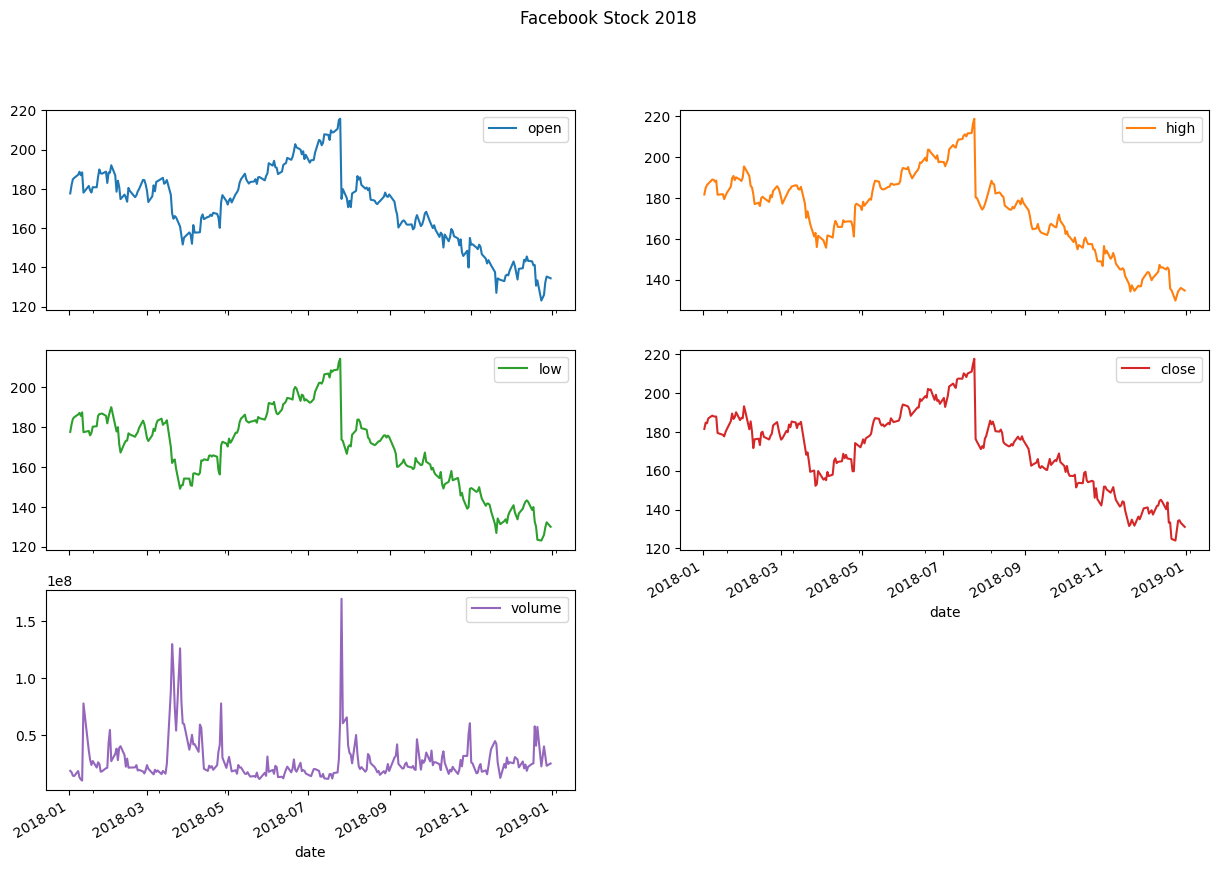

In [36]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

*NOTE: we specified the line styles here so that the lines can be distinguished in the text as a black and white image.*

## Visualizing relationships between variables
### Scatter plots
We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in `kind='scatter'` along with a column for the x-axis and a column for the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

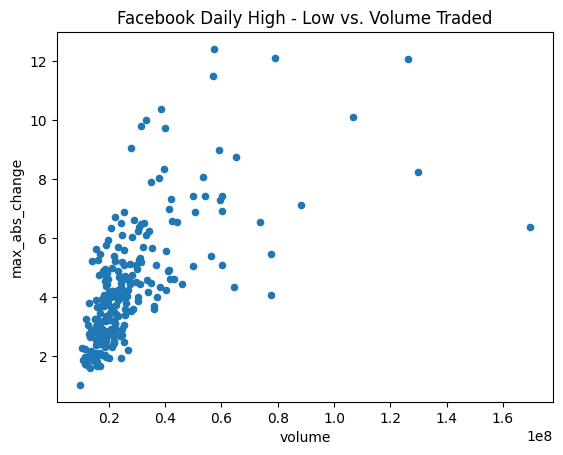

In [37]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With `pandas`, we simply pass in `logx=True`:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

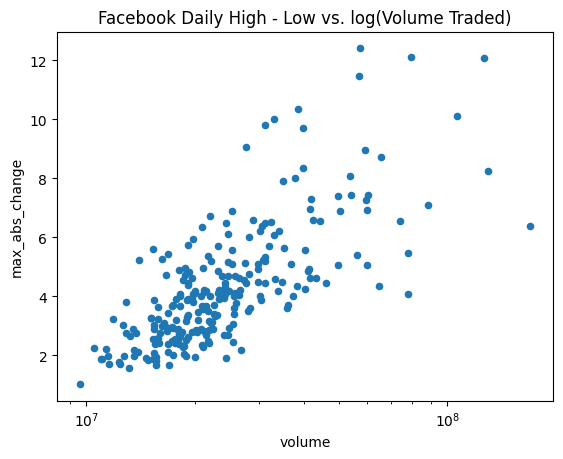

In [38]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

With `matplotlib`, we could use `plt.xscale('log')` to do the same thing.

### Adding Transparency to Plots with `alpha`
Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the `alpha` parameter. It is a float in the range [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

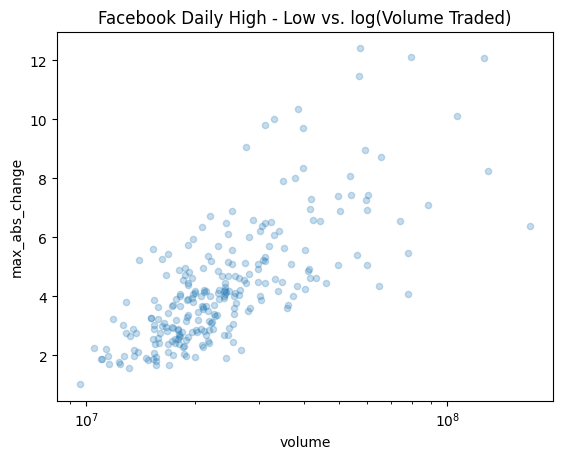

In [39]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

### Hexbins
In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With `pandas`, this is the `hexbin` value for the `kind` argument. It may also be necessary to tweak the `gridsize`, which determines the number of hexagons along the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

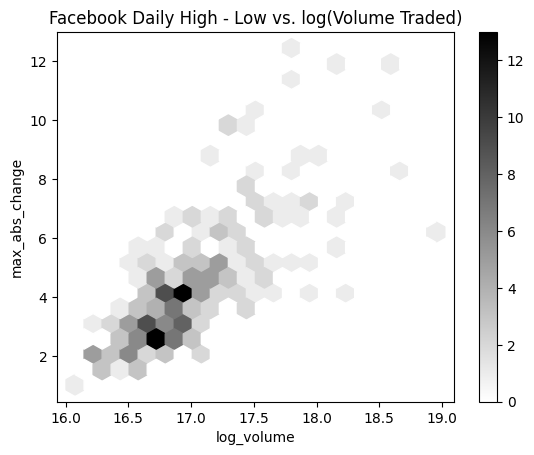

In [40]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis
)

### Visualizing Correlations with Heatmaps
Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use `matshow()` from matplotlib:

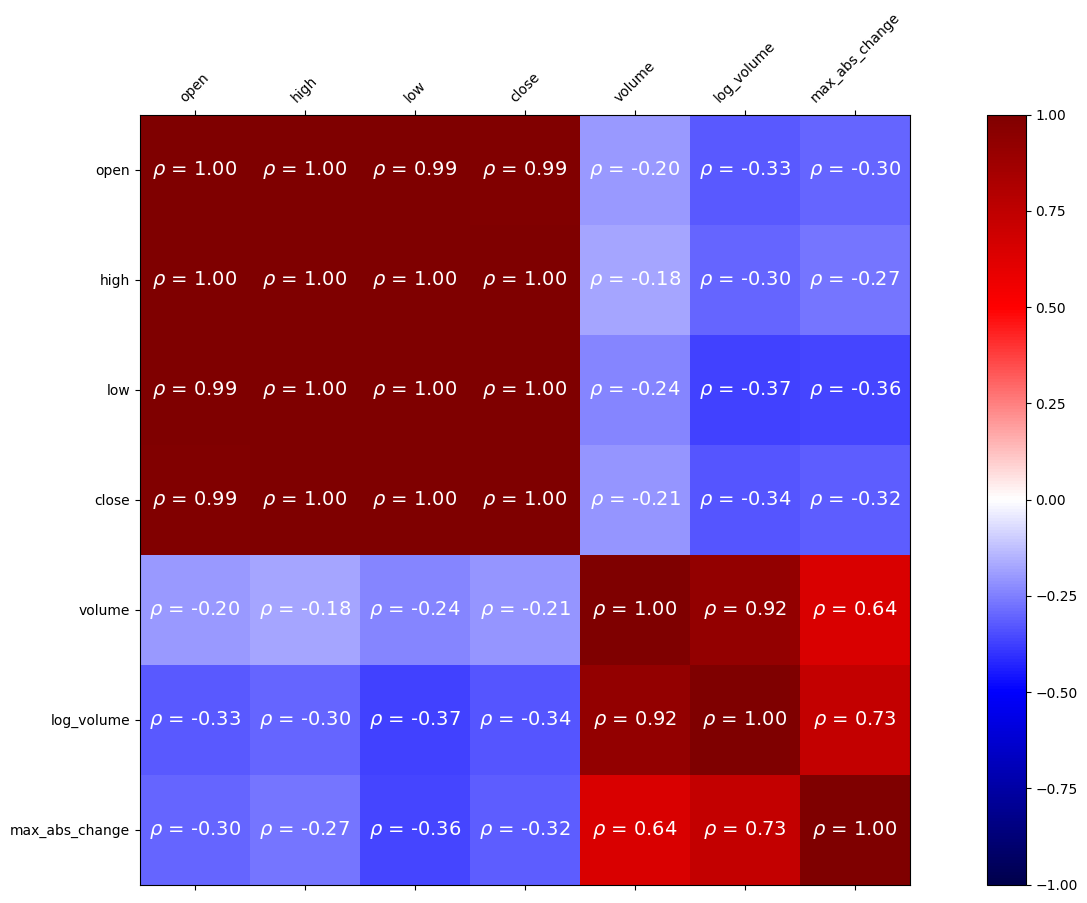

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

Accessing the values in the correlation matrix can be done with `loc[]`:

In [42]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Visualizing distributions
### Histograms
With the `pandas`, making histograms is as easy as passing `kind='hist'` to the `plot()` method:

Text(0.5, 0, 'Volume traded')

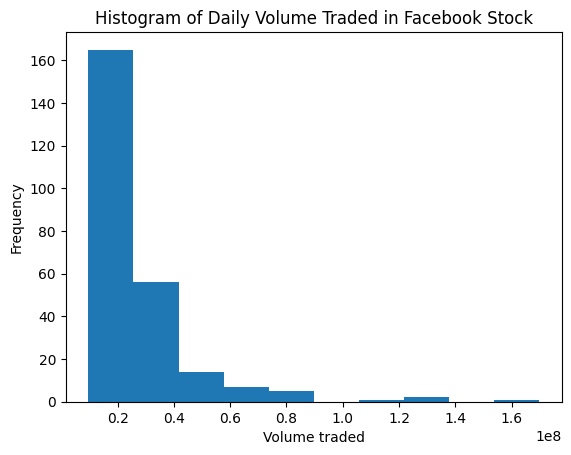

In [43]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis

### Kernel Density Estimation (KDE)
We can pass `kind='kde'` for an estimate of the probability density function (PDF), which tells us the probability of getting a particular value:

ModuleNotFoundError: No module named 'scipy'

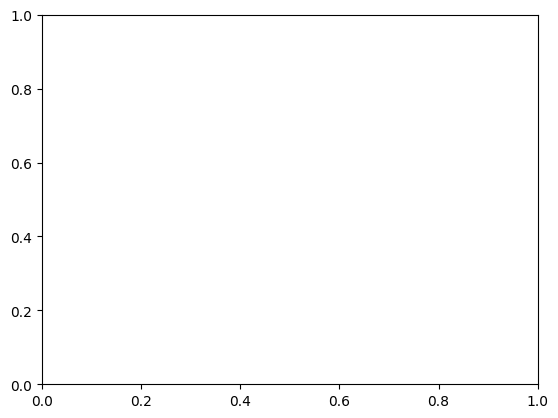

In [44]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis

### Adding to the result of `plot()`
The `plot()` method returns an `Axes` object. We can store this for additional customization of the plot, or we can pass this into another call to `plot()` as the `ax` argument to add to the original plot. 

It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

ModuleNotFoundError: No module named 'scipy'

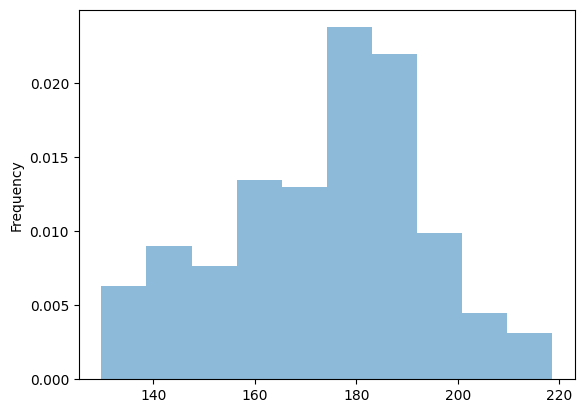

In [45]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis

### Box plots
To make box plots with `pandas`, we pass `kind='box'` to the `plot()` method:

Text(0, 0.5, 'price ($)')

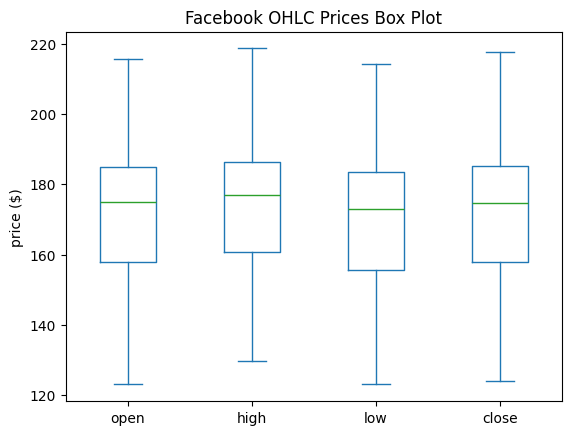

In [46]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the y-axis

In [48]:
%matplotlib inline
quakes = pd.read_csv('earthquakes.csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').sort_index()['2020-01-18':'2020-09-18']

## Counts and frequencies
### Bar charts
Passing `kind='barh'` gives us horizontal bars while `kind='bar'` gives us vertical ones. Let's use horizontal bars to look at the top 15 places for earthquakes in our data:

Text(0.5, 0, 'earthquakes')

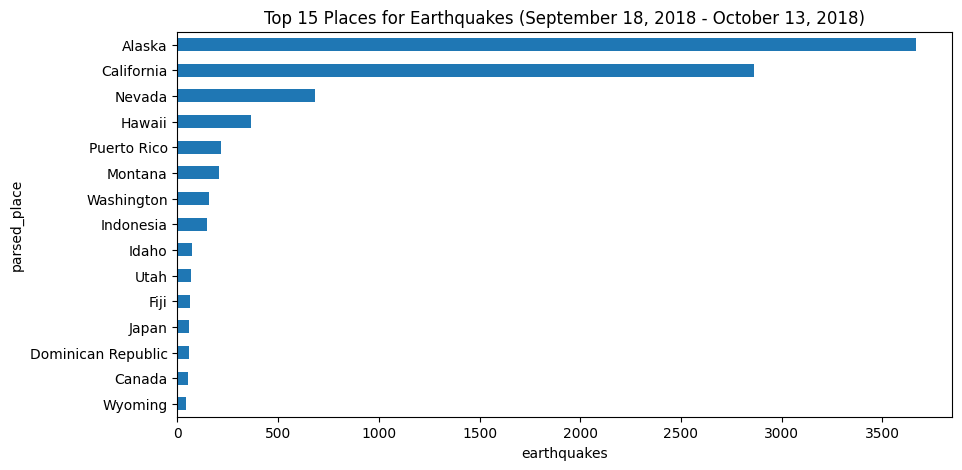

In [49]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

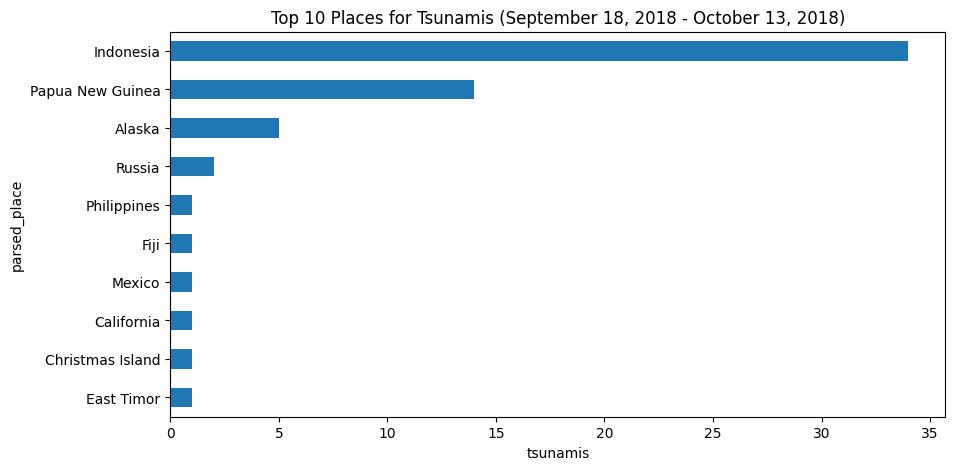

In [50]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis

### Grouped Bars

Text(0, 0.5, '')

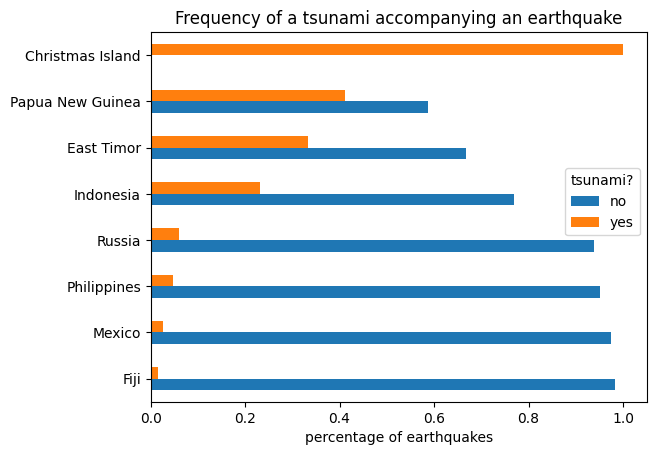

In [51]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake'
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Using the `kind` arugment for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

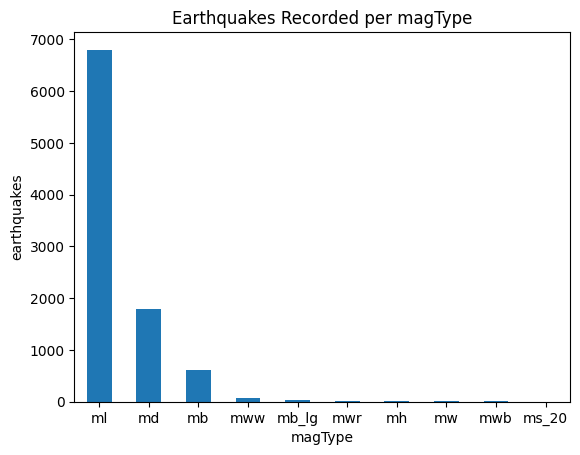

In [52]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes
plt.xlabel('magType')
plt.ylabel('earthquakes')

### Stacked bars

<Axes: title={'center': 'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

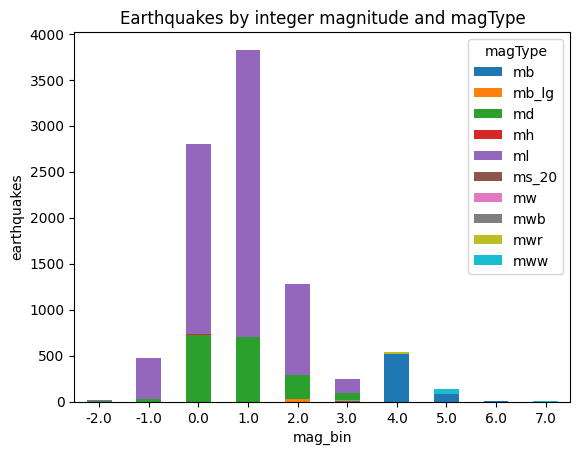

In [53]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

#### Normalized stacked bars
Plot the percentages to be better able to see the different `magTypes`.

Text(0, 0.5, 'percentage')

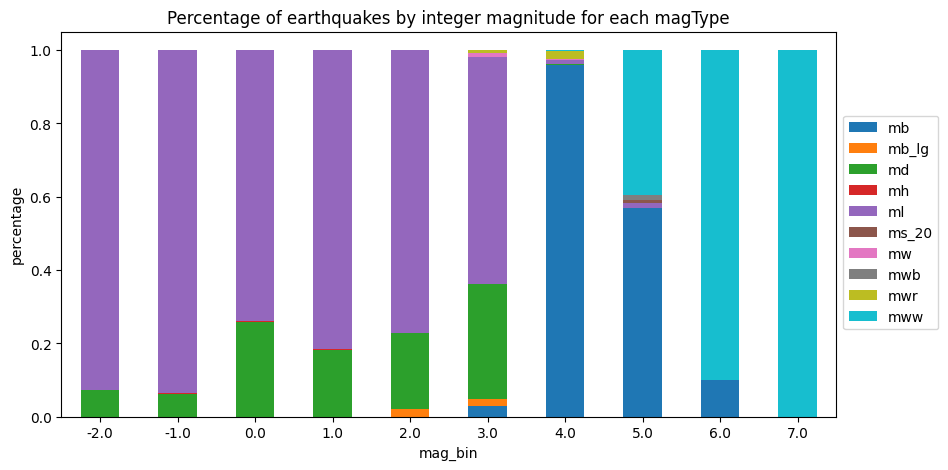

In [54]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the y-axis

We can also create horizontal stacked bars and do so using `groupby()` and `unstack()`:

Text(0, 0.5, '')

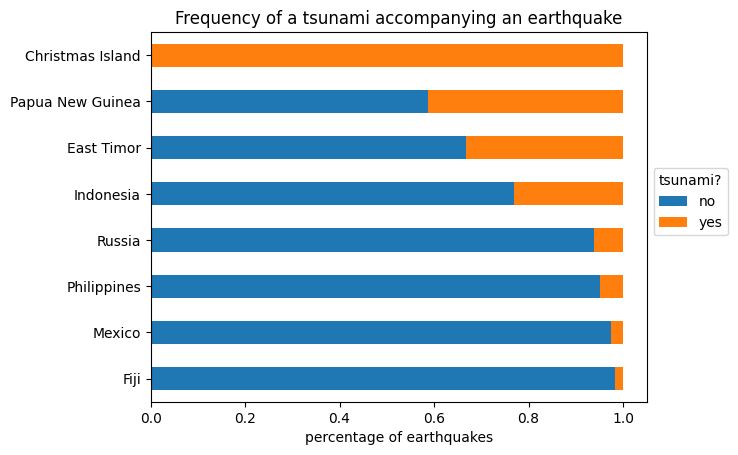

In [55]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake', 
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

## Exercise 3.1

### Add here any missing plots/shapes (e.g. violin is missing) as discussed in the slides of chapter 3. Use any dataset of your choice. The more the plots/shapes the more the score. 

### Happy Coding